### Plot analyses of van der Meer subduction zones

- plotting based on the results of VDM number-crunching scripts, results are loaded here from csv files

In [24]:
# Load dependncies
import pygplates
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import pandas as pd

%matplotlib inline

LLSVP_edge_filename = '/Users/Simon/Data/SeismicTomography/SMEAN/SMEANSLOW1'


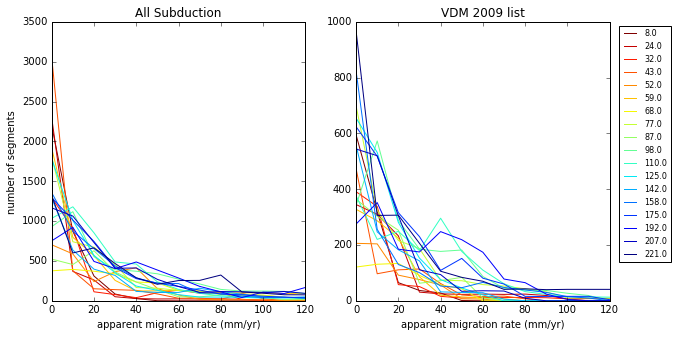

In [4]:
# Load the csv files for the van der Meer subduction
df_AllTimes_2009 = pd.read_csv('./VDM_subduction_distances_2009list.csv')    
df_AllTimes = pd.read_csv('./VDM_subduction_distances.csv')    


# Histograms showing the apparent trench migration rate for different 
# time steps in the van der Meer interpretation
# 
unique_times = df_AllTimes.Age.unique()

plt.figure(figsize=(10,5))

dat = []
color_idx = np.linspace(0, 1, len(unique_times))
for index,(i,time) in enumerate(zip(color_idx,unique_times)):
    plt.subplot(121)
    subset = df_AllTimes[df_AllTimes['Age']==time]
    res = np.histogram(subset['dist2SameSZ'],bins=np.arange(0,201,10))
    dat.append(res[0])
    plt.plot(res[1][:-1],res[0],color=plt.cm.jet_r(i),label=time)
    plt.subplot(122)
    subset = df_AllTimes_2009[df_AllTimes_2009['Age']==time]
    res = np.histogram(subset['dist2SameSZ'],bins=np.arange(0,201,10))
    dat.append(res[0])
    plt.plot(res[1][:-1],res[0],color=plt.cm.jet_r(i),label=time)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=8)
plt.subplot(121)
plt.xlabel('apparent migration rate (mm/yr)')
plt.ylabel('number of segments')
plt.xlim(0,120)
plt.title('All Subduction')

plt.subplot(122)
plt.xlabel('apparent migration rate (mm/yr)')
#plt.ylim(0,2500)
plt.xlim(0,120)
plt.title('VDM 2009 list')

plt.show()

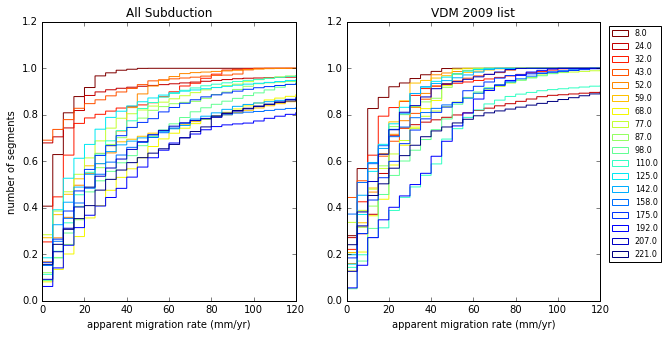

In [8]:
plt.figure(figsize=(10,5))

color_idx = np.linspace(0, 1, len(unique_times))
for index,(i,time) in enumerate(zip(color_idx,unique_times)):
    plt.subplot(121)
    subset = df_AllTimes[df_AllTimes['Age']==time]
    plt.hist(subset['dist2SameSZ'],bins=np.arange(0,301,5),
             color=plt.cm.jet_r(i),cumulative=True,normed=True,histtype='step',
             label=str(time),linewidth=1)
    plt.subplot(122)
    subset = df_AllTimes_2009[df_AllTimes_2009['Age']==time]
    plt.hist(subset['dist2SameSZ'],bins=np.arange(0,301,5),
             color=plt.cm.jet_r(i),cumulative=True,normed=True,histtype='step',
             label=str(time),linewidth=1)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=8)
plt.subplot(121)
plt.xlabel('apparent migration rate (mm/yr)')
plt.ylabel('number of segments')
plt.xlim(0,120)
plt.title('All Subduction')

plt.subplot(122)
plt.xlabel('apparent migration rate (mm/yr)')
plt.xlim(0,120)
plt.title('VDM 2009 list')
plt.show()



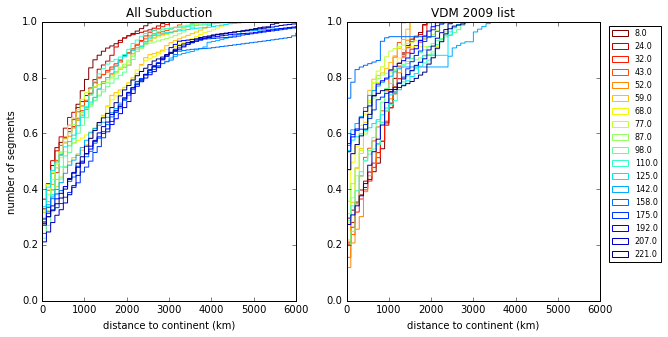

In [9]:
plt.figure(figsize=(10,5))

color_idx = np.linspace(0, 1, len(unique_times))
for index,(i,time) in enumerate(zip(color_idx,unique_times)):
    plt.subplot(121)
    subset = df_AllTimes[df_AllTimes['Age']==time]
    plt.hist(subset['dist2cont'],bins=np.arange(0,8001,100),
         color=plt.cm.jet_r(i),cumulative=True,normed=True,histtype='step',label=str(time))
    plt.subplot(122)
    subset = df_AllTimes_2009[df_AllTimes_2009['Age']==time]
    plt.hist(subset['dist2cont'],bins=np.arange(0,8001,100),
         color=plt.cm.jet_r(i),cumulative=True,normed=True,histtype='step',label=str(time))

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=8)
plt.subplot(121)
plt.xlabel('distance to continent (km)')
plt.ylabel('number of segments')
plt.xlim(0,6000)
plt.ylim(0,1)
plt.title('All Subduction')

plt.subplot(122)
plt.xlabel('distance to continent (km)')
plt.xlim(0,6000)
plt.ylim(0,1)
plt.title('VDM 2009 list')
plt.show()



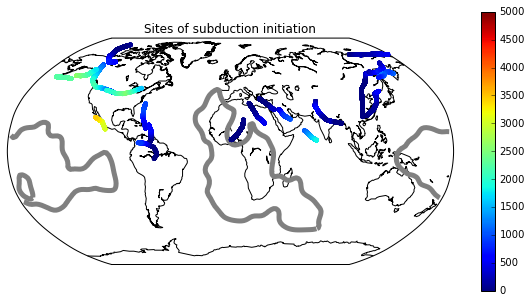

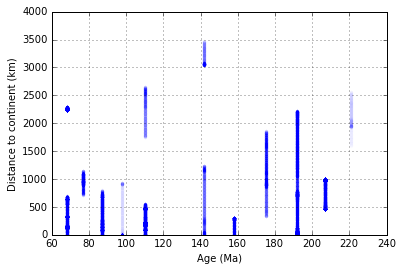

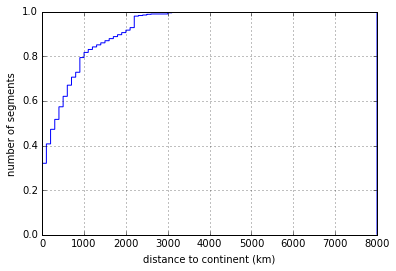

In [23]:
df_init = pd.read_csv('./VDM_subduction_initiation.csv')

plt.figure(figsize=(10,5))
m = Basemap(projection='robin',lon_0=0)
m.drawcoastlines()
m.readshapefile(LLSVP_edge_filename,'tmp',color='gray',linewidth=5,zorder=2)
x,y = m(np.array(df_init['lon']),np.array(df_init['lat']))
m.scatter(x,y,c=df_init['dist2cont'],edgecolor='',vmin=0,vmax=5000,zorder=4)
plt.title('Sites of subduction initiation')
plt.colorbar()
plt.show()

# TODO - get the reconstructed continents, and get distances to subduction 'initiation' and 'death', 
# then plot distributions
# also plot distribution of subduction zones at all
# Also plot the migration rate for these labelled subduction zones only (as opposed to previous
# version which threw everything in)

plt.figure()
plt.plot(df_init['Age'],df_init['dist2cont'],'.',alpha=0.01)
plt.xlabel('Age (Ma)')
plt.ylabel('Distance to continent (km)')
plt.ylim(0,4000)
plt.grid()
plt.show()

plt.hist(np.array(df_init['dist2cont']),bins=np.arange(0,8001,100),
         cumulative=True,normed=True,histtype='step')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=8)
plt.xlabel('distance to continent (km)')
plt.ylabel('number of segments')
plt.ylim(0,1)
#plt.xlim(0,1000)
plt.grid()
plt.show()


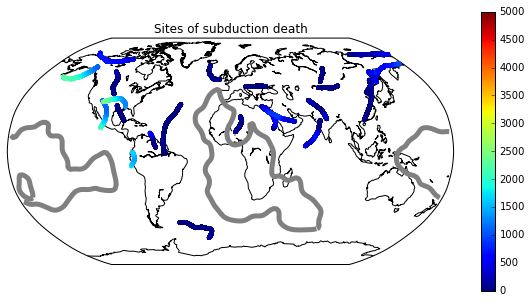

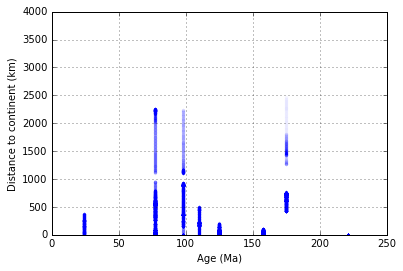

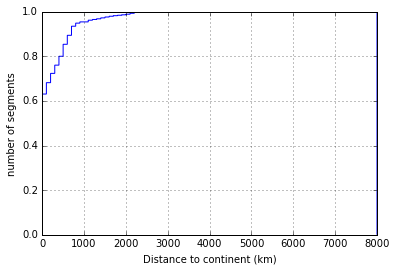

In [22]:
df_death = pd.read_csv('./VDM_subduction_death.csv')

df_death=df_death[df_death['Age']>10]

plt.figure(figsize=(10,5))
m = Basemap(projection='robin',lon_0=0)
m.drawcoastlines()
m.readshapefile(LLSVP_edge_filename,'tmp',color='gray',
                linewidth=5,zorder=2)
x,y = m(np.array(df_death['lon']),np.array(df_death['lat']))
m.scatter(x,y,c=df_death['dist2cont'],edgecolor='',vmin=0,vmax=5000,zorder=4)
plt.title('Sites of subduction death')
plt.colorbar()
plt.show()

plt.figure()
plt.plot(df_death['Age'],df_death['dist2cont'],'.',alpha=0.01)
plt.xlabel('Age (Ma)')
plt.ylabel('Distance to continent (km)')
plt.ylim(0,4000)
plt.grid()
plt.show()

plt.hist(np.array(df_death['dist2cont']),bins=np.arange(0,8001,100),
         cumulative=True,normed=True,histtype='step')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=8)
plt.xlabel('Distance to continent (km)')
plt.ylabel('number of segments')
plt.ylim(0,1)
#plt.xlim(0,1000)
plt.grid()
plt.show()



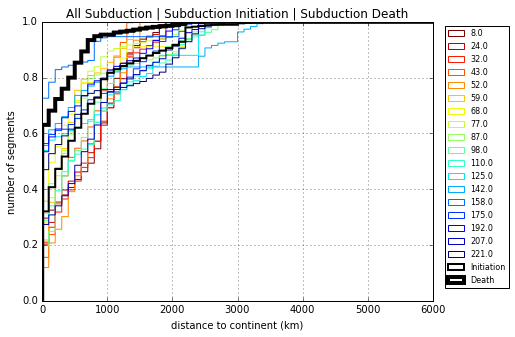

In [33]:
plt.figure(figsize=(7,5))

color_idx = np.linspace(0, 1, len(unique_times))
for index,(i,time) in enumerate(zip(color_idx,unique_times)):
    subset = df_AllTimes_2009[df_AllTimes_2009['Age']==time]
    plt.hist(subset['dist2cont'],bins=np.arange(0,8001,100),
         color=plt.cm.jet_r(i),cumulative=True,normed=True,histtype='step',label=str(time))

plt.hist(np.array(df_init['dist2cont']),bins=np.arange(0,8001,100),
         cumulative=True,normed=True,histtype='step',
         linewidth=4,color='black',label='Initiation')

plt.hist(np.array(df_death['dist2cont']),bins=np.arange(0,8001,100),
         cumulative=True,normed=True,histtype='step',
         linewidth=4,color='darkgreen',label='Death')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=8)

plt.xlabel('distance to continent (km)')
plt.ylabel('number of segments')
plt.xlim(0,6000)
plt.ylim(0,1)
plt.title('All Subduction | Subduction Initiation | Subduction Death')
plt.grid()

plt.show()




#### Figure interpretation
- NOTE: This is only for the subset of van der Meer subduction zones that are listed in his table, not the whole thing.
- The 'Death' subduction points are typically closer to the continent than the initiation points
- The subduction points in general show a strange(?) where most subduction in recent times is further away from continents, then gets closer on average further back in time (counter to expectation).
